In [7]:
# pip install -U scikit-learn --user

In [8]:
# pip install pandas

In [9]:
# pip install seaborn

In [1]:
import torch
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'https://raw.githubusercontent.com/u-nivusJO/data_file/main/airquality.csv'
data = pd.read_csv(path)

# 1. 데이터 마이닝 

In [3]:
# 상위 5개행 확인
data.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [10]:
# 하위 5개행 확인
data.tail()

,Ozone,Solar.R,Wind,Temp,Month,Day
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29
152,20.0,223.0,11.5,68,9,30


In [4]:
# 변수 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


In [5]:
# 기초통계량 확인
data.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,116.000000,146.000000,153.000000,153.000000,153.000000,153.000000
mean,42.129310,185.931507,9.957516,77.882353,6.993464,15.803922
std,32.987885,90.058422,3.523001,9.465270,1.416522,8.864520
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,18.000000,115.750000,7.400000,72.000000,6.000000,8.000000
50%,31.500000,205.000000,9.700000,79.000000,7.000000,16.000000
75%,63.250000,258.750000,11.500000,85.000000,8.000000,23.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


In [6]:
# 상관관계 확인
data.corr()

,Ozone,Solar.R,Wind,Temp,Month,Day
Ozone,1.000000,0.348342,-0.601547,0.698360,0.164519,-0.013226
Solar.R,0.348342,1.000000,-0.056792,0.275840,-0.075301,-0.150275
Wind,-0.601547,-0.056792,1.000000,-0.457988,-0.178293,0.027181
Temp,0.698360,0.275840,-0.457988,1.000000,0.420947,-0.130593
Month,0.164519,-0.075301,-0.178293,0.420947,1.000000,-0.007962
Day,-0.013226,-0.150275,0.027181,-0.130593,-0.007962,1.000000


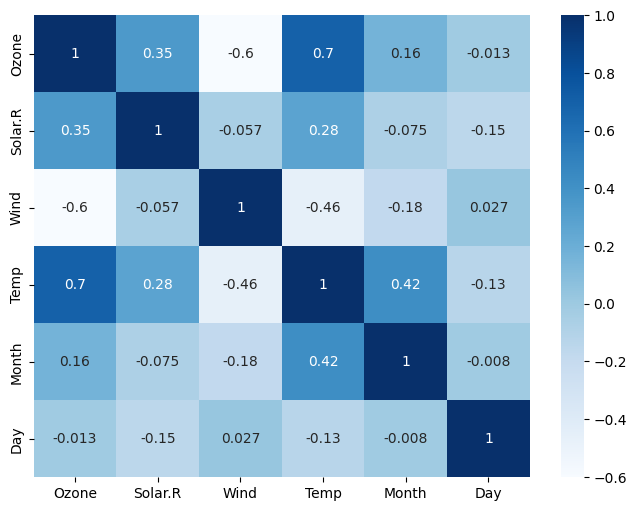

In [7]:
# 상관관계 시각화
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap='Blues') 
# annot : 숫자보이게, cmap : 색상
plt.show()

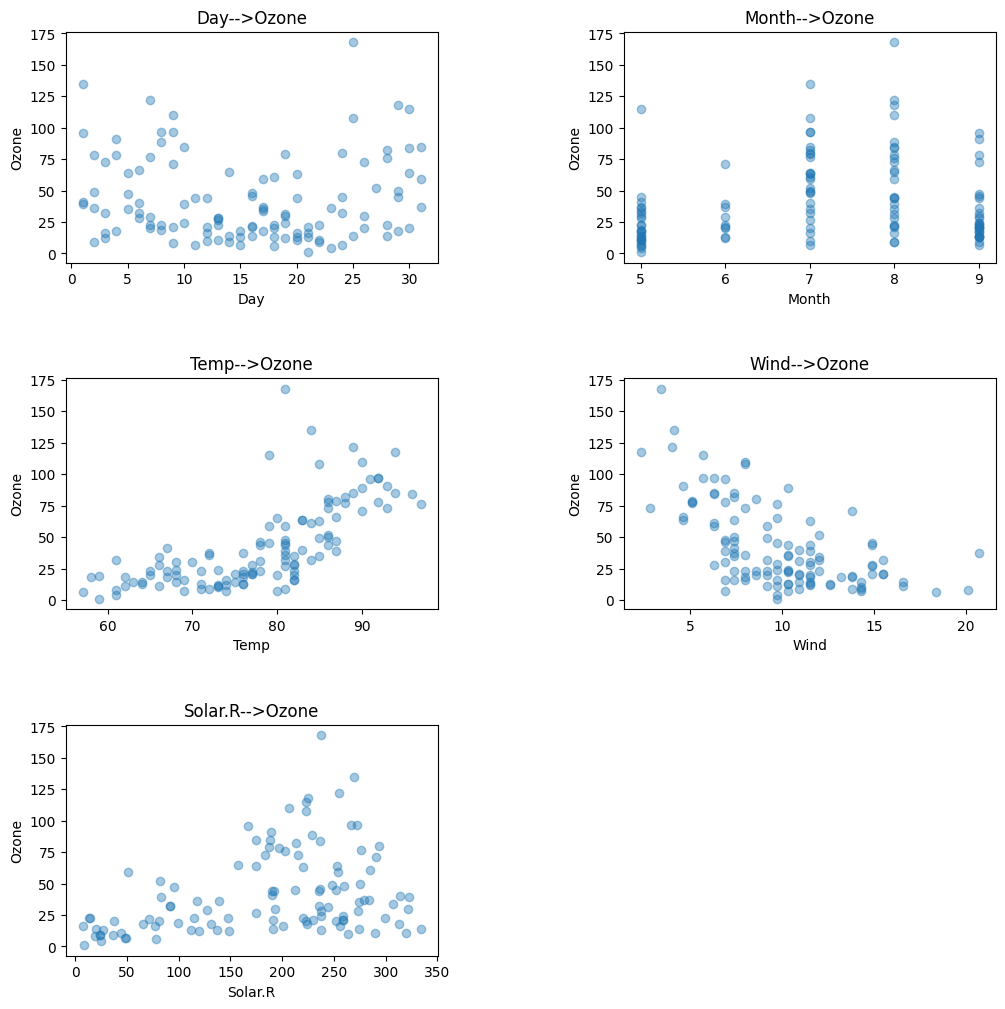

In [8]:
# Ozone과의 상관관계를 산점도로 나타내기 
fig=plt.figure(figsize=(12,12))

# 1. Day-->Ozone 상관관계
corr1=plt.subplot(321)
corr1.scatter(data['Day'], data['Ozone'], alpha = 0.4)
# alpha : 투명도
corr1.set_xlabel('Day')
corr1.set_ylabel('Ozone')
corr1.set_title('Day-->Ozone')

# 2. Month-->Ozone 상관관계
corr2=plt.subplot(322)
corr2.scatter(data['Month'], data['Ozone'], alpha = 0.4)
corr2.set_xlabel('Month')
corr2.set_ylabel('Ozone')
corr2.set_title('Month-->Ozone')

# 3. Temp-->Ozone 상관관계
corr3=plt.subplot(323)
corr3.scatter(data['Temp'], data['Ozone'], alpha = 0.4)
corr3.set_xlabel('Temp')
corr3.set_ylabel('Ozone')
corr3.set_title('Temp-->Ozone')

# 4. Wind-->Ozone 상관관계
corr4=plt.subplot(324)
corr4.scatter(data['Wind'], data['Ozone'], alpha = 0.4)
corr4.set_xlabel('Wind')
corr4.set_ylabel('Ozone')
corr4.set_title('Wind-->Ozone')

# 5. Solar.R-->Ozone 상관관계
corr5=plt.subplot(325)
corr5.scatter(data['Solar.R'], data['Ozone'], alpha = 0.4)
corr5.set_xlabel('Solar.R')
corr5.set_ylabel('Ozone')
corr5.set_title('Solar.R-->Ozone')

# subplot 간 간격 조정
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

In [9]:
# 결측치 확인
data.isnull().sum()

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

In [13]:
# 결측치 처리
# 1. Ozone은 target이므로 결측치가 없어야한다->따라서 Ozone 값이 결측치인 행 삭제
data.dropna(subset=['Ozone'], inplace=True)
# 2. Solar.R은 선형보간법으로 결측치 채우기 
#: 태양복사는 대체적으로 전날과 다음날의 날씨와 비슷할 것이기 때문에 선형적 일관성을 갖게하는 선형보간법 이용
data.interpolate(method='linear', inplace=True)

# 결측치 처리 확인
data.isnull().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

In [14]:
# 불필요한 변수 제거
col_delete=['Day', 'Month']
data.drop(col_delete, axis=1, inplace=True) # axis=0 : 행, axis=1 : 열

# 변수 제거 확인
data.head()

,Ozone,Solar.R,Wind,Temp
0,41.0,190.0,7.4,67
1,36.0,118.0,8.0,72
2,12.0,149.0,12.6,74
3,18.0,313.0,11.5,62
5,28.0,306.0,14.9,66


# 2. 모델링

In [15]:
# x, y 분리
target = 'Ozone'

x=data.drop(target, axis=1)
y=data[target]

In [16]:
# 학습용, 평가용 데이터 분리(7:3)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.3)

**1) LinearRegression**

In [19]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)

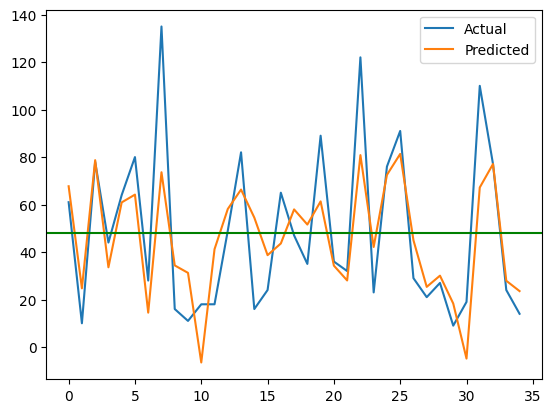

In [20]:
# 예측값과 실제값 시각화 비교
mean_ozone = y_test.mean()

plt.plot(y_test.values)
plt.plot(y_pred)
plt.axhline(mean_ozone, color = 'g')
plt.legend(['Actual', 'Predicted'])
plt.show()

# 3. 성능 평가

**1) MAE(Mean Absolute Error)**

$$\large MAE=\frac{1}{n}\sum_{i=1}^{n}|y_{i}-\hat{y}_{i}|$$

In [21]:
from sklearn.metrics import mean_absolute_error

print('MAE', mean_absolute_error(y_test, y_pred))

MAE 15.981205440310944


**2) MSE(Mean Squared Error)**

$$\large MSE=\frac{1}{n}\sum_{i=1}^{n}(y_{i}-\hat{y}_{i})^2$$

In [22]:
from sklearn.metrics import mean_squared_error

print('MSE', mean_squared_error(y_test, y_pred))

MSE 433.65300177792614


**3) RMSE(Root Mean Squared Error)**

$$\large RMSE=\sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_{i}-\hat{y}_{i})^2}$$

In [23]:
print('RMSE', mean_squared_error(y_test, y_pred)**(1/2))

RMSE 20.824336766819876


**4) MAPE(Mean Absolute Percentage Error)**

$$\large MAPE=\frac{100}{n}\sum_{i=1}^{n}\left |\frac{y_{i}-\hat{y}_{i}}{y_{i}}\right |$$

In [24]:
from sklearn.metrics import mean_absolute_percentage_error

print('MAPE', mean_absolute_percentage_error(y_test, y_pred))

MAPE 0.5509274118885193


**5) R-Squared**

$$\large R^2=1-\frac{SSE}{SST}=1-\frac{\sum_{i=1}^{n}(y_{i}-\hat{y}_{i})^2}{\sum_{i=1}^{n}(y_{i}-\bar{y}_{i})^2}$$

In [28]:
from sklearn.metrics import r2_score

print('R2', r2_score(y_test, y_pred))
print('score', lr_model.score(x_test, y_test)) # r2와 같은 값

R2 0.6234903983372838
score 0.6234903983372838
